In [9]:
import os
import cv2
import numpy as np
import glob
import rasterio
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import MeanIoU
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import patchify
from patchify import patchify, unpatchify

In [2]:
temp_img_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
temp_mask_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
temp_ndvi_path = "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDVI/NDVI_Landsat_2022_01_NDVI.tif.tif"
temp_evi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/EVI/EVI_Landsat_2022_01_EVI.tif.tif"
temp_ndwi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDWI/NDWI_Landsat_2022_01_NDWI.tif.tif"
temp_nir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/Landsat_Landsat_2022_01_NIR.tif.tif"
temp_red_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/Landsat_Landsat_2022_01_RED.tif.tif"
temp_swir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/SWIR/Landsat_Landsat_2022_01_SWIR.tif.tif"
temp_tirs_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/TIRS/Landsat_Landsat_2022_01_TIRS.tif.tif"
temp_cont_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CONTRAST/GLCM_contrast_2022.tif.tif"
temp_diss_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/DISSIMILARITY/GLCM_dissimilarity_2022.tif.tif"
temp_corr_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CORRELATION/GLCM_correlation_2022.tif.tif"
temp_slp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/SLOPE/Slope.tif"
temp_asp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ASPECT/Aspect.tif"
temp_elv_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ELEVATION/Elevation.tif"

# Check if the image files exist
import os
print("Image file exists:", os.path.exists(temp_img_path))
print("Mask file exists:", os.path.exists(temp_mask_path))
print("Mask file exists:", os.path.exists(temp_ndvi_path))
print("Mask file exists:", os.path.exists(temp_evi_path))
print("Mask file exists:", os.path.exists(temp_ndwi_path))
print("Mask file exists:", os.path.exists(temp_nir_path))
print("Mask file exists:", os.path.exists(temp_red_path))
print("Mask file exists:", os.path.exists(temp_swir_path))
print("Mask file exists:", os.path.exists(temp_tirs_path))
print("Mask file exists:", os.path.exists(temp_cont_path))
print("Mask file exists:", os.path.exists(temp_ndwi_path))
print("Mask file exists:", os.path.exists(temp_diss_path))
print("Mask file exists:", os.path.exists(temp_corr_path))
print("Mask file exists:", os.path.exists(temp_slp_path))
print("Mask file exists:", os.path.exists(temp_asp_path))
print("Mask file exists:", os.path.exists(temp_elv_path))

Image file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True


Labels are: [1 2 3 4 5 6] and the counts are: [1037637  964855  471050 1117847   30291  184121]


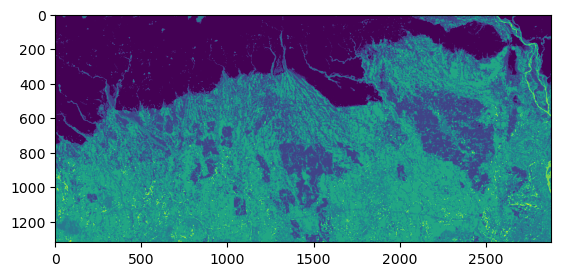

In [3]:
# Check if the image files exist
if os.path.exists(temp_img_path) and os.path.exists(temp_mask_path):
    # Load the image using rasterio
    with rasterio.open(temp_img_path) as img_ds:
        # Read the image data and replace NaN with zero
        temp_img = img_ds.read()
        temp_img = np.nan_to_num(temp_img, nan=0)
        
        # Visualize one of the channels (adjust the index as needed)
        plt.imshow(temp_img[0, :, :])  # Adjust the channel index as needed

    # Load the mask using rasterio
    with rasterio.open(temp_mask_path) as mask_ds:
        temp_mask = mask_ds.read()
        temp_mask = np.nan_to_num(temp_mask, nan=0)
        
        #plt.imshow(temp_mask[0, :, :])  # Adjust the channel index as needed
        

        # Check the unique labels in the mask
        labels, count = np.unique(temp_mask[0, :, :], return_counts=True)

        print("Labels are:", labels, "and the counts are:", count)
else:
    print("Image file or mask file does not exist or file paths are incorrect.")

# Show the image
plt.show()

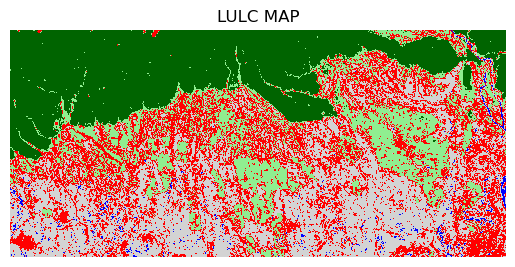

(1, 1321, 2881)


In [6]:
# You can choose preferable colors for each class
class_colors = {
    1: 'darkgreen',         # Class 1: Forest
    2: 'lightgreen',        # Class 2: Tea Garden
    3: 'red',               # Class 3: Settlement
    4: 'lightgray',          # Class 4: Barren Land
    5: 'blue',                # Class 5: Water Body
    6: 'coral'                 # Class 6: Home Garden
}

# Create a colormap with specific colors
cmap = mcolors.ListedColormap([class_colors[i] for i in sorted(class_colors.keys())])

# Determine the year based on the start_year and the image index
#current_year = start_year + image_index

# Show the reconstructed image with the title
plt.imshow(temp_img[0, :, :], cmap=cmap)
plt.title(f'LULC MAP')
plt.axis('off')
plt.show()

# Print the updated shape of the reconstructed image
print(temp_img.shape)


In [7]:
img_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
mask_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
ndvi_path = "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDVI/NDVI_Landsat_2022_01_NDVI.tif.tif"
evi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/EVI/EVI_Landsat_2022_01_EVI.tif.tif"
ndwi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDWI/NDWI_Landsat_2022_01_NDWI.tif.tif"
nir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/Landsat_Landsat_2022_01_NIR.tif.tif"
red_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/Landsat_Landsat_2022_01_RED.tif.tif"
swir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/SWIR/Landsat_Landsat_2022_01_SWIR.tif.tif"
tirs_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/TIRS/Landsat_Landsat_2022_01_TIRS.tif.tif"
cont_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CONTRAST/GLCM_contrast_2022.tif.tif"
diss_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/DISSIMILARITY/GLCM_dissimilarity_2022.tif.tif"
corr_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CORRELATION/GLCM_correlation_2022.tif.tif"
slp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/SLOPE/Slope.tif"
asp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ASPECT/Aspect.tif"
elv_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ELEVATION/Elevation.tif"

In [37]:
# Loop through subdirectories and process images
for path, subdirs, files in os.walk("D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/"):
    for image_name in files:
        if image_name.endswith(".tif"):
            image_path = os.path.join(path, image_name)

In [38]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/ndwi/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(ndwi_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/ndwi/", 'ndwi' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")

Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/n

Saved patch 83 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_83.tif
Saved patch 84 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_84.tif
Saved patch 85 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_85.tif
Saved patch 86 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_86.tif
Saved patch 87 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_87.tif
Saved patch 88 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_88.tif
Saved patch 89 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_89.tif
Saved patch 90 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64

Saved patch 151 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_151.tif
Saved patch 152 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_152.tif
Saved patch 153 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_153.tif
Saved patch 154 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_154.tif
Saved patch 155 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_155.tif
Saved patch 156 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_156.tif
Saved patch 157 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_157.tif
Saved patch 158 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

Saved patch 251 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_251.tif
Saved patch 252 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_252.tif
Saved patch 253 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_253.tif
Saved patch 254 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_254.tif
Saved patch 255 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_255.tif
Saved patch 256 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_256.tif
Saved patch 257 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_257.tif
Saved patch 258 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

Saved patch 336 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_336.tif
Saved patch 337 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_337.tif
Saved patch 338 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_338.tif
Saved patch 339 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_339.tif
Saved patch 340 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_340.tif
Saved patch 341 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_341.tif
Saved patch 342 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_342.tif
Saved patch 343 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

Saved patch 401 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_401.tif
Saved patch 402 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_402.tif
Saved patch 403 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_403.tif
Saved patch 404 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_404.tif
Saved patch 405 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_405.tif
Saved patch 406 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_406.tif
Saved patch 407 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_407.tif
Saved patch 408 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

Saved patch 521 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_521.tif
Saved patch 522 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_522.tif
Saved patch 523 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_523.tif
Saved patch 524 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_524.tif
Saved patch 525 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_525.tif
Saved patch 526 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_526.tif
Saved patch 527 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_527.tif
Saved patch 528 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

Saved patch 600 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_600.tif
Saved patch 601 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_601.tif
Saved patch 602 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_602.tif
Saved patch 603 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_603.tif
Saved patch 604 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_604.tif
Saved patch 605 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_605.tif
Saved patch 606 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_606.tif
Saved patch 607 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

Saved patch 697 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_697.tif
Saved patch 698 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_698.tif
Saved patch 699 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_699.tif
Saved patch 700 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_700.tif
Saved patch 701 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_701.tif
Saved patch 702 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_702.tif
Saved patch 703 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_703.tif
Saved patch 704 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

Saved patch 818 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_818.tif
Saved patch 819 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_819.tif
Saved patch 820 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_820.tif
Saved patch 821 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_821.tif
Saved patch 822 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_822.tif
Saved patch 823 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_823.tif
Saved patch 824 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_824.tif
Saved patch 825 from ndwi_patch_0.tif as D:/Jintu/Jintu_LULC/TestDL_5/Data Preparat

In [39]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/evi/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(evi_path)



# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/evi/", 'evi' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")

Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/D

Saved patch 64 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_64.tif
Saved patch 65 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_65.tif
Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFo

Saved patch 171 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_171.tif
Saved patch 172 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_172.tif
Saved patch 173 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_173.tif
Saved patch 174 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_174.tif
Saved patch 175 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_175.tif
Saved patch 176 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_176.tif
Saved patch 177 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_177.tif
Saved patch 178 from ndwi_patch_0.tif as D:/Jint

Saved patch 262 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_262.tif
Saved patch 263 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_263.tif
Saved patch 264 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_264.tif
Saved patch 265 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_265.tif
Saved patch 266 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_266.tif
Saved patch 267 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_267.tif
Saved patch 268 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_268.tif
Saved patch 269 from ndwi_patch_0.tif as D:/Jint

Saved patch 324 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_324.tif
Saved patch 325 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_325.tif
Saved patch 326 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_326.tif
Saved patch 327 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_327.tif
Saved patch 328 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_328.tif
Saved patch 329 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_329.tif
Saved patch 330 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_330.tif
Saved patch 331 from ndwi_patch_0.tif as D:/Jint

Saved patch 385 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_385.tif
Saved patch 386 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_386.tif
Saved patch 387 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_387.tif
Saved patch 388 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_388.tif
Saved patch 389 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_389.tif
Saved patch 390 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_390.tif
Saved patch 391 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_391.tif
Saved patch 392 from ndwi_patch_0.tif as D:/Jint

Saved patch 495 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_495.tif
Saved patch 496 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_496.tif
Saved patch 497 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_497.tif
Saved patch 498 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_498.tif
Saved patch 499 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_499.tif
Saved patch 500 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_500.tif
Saved patch 501 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_501.tif
Saved patch 502 from ndwi_patch_0.tif as D:/Jint

Saved patch 590 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_590.tif
Saved patch 591 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_591.tif
Saved patch 592 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_592.tif
Saved patch 593 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_593.tif
Saved patch 594 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_594.tif
Saved patch 595 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_595.tif
Saved patch 596 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_596.tif
Saved patch 597 from ndwi_patch_0.tif as D:/Jint

Saved patch 681 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_681.tif
Saved patch 682 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_682.tif
Saved patch 683 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_683.tif
Saved patch 684 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_684.tif
Saved patch 685 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_685.tif
Saved patch 686 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_686.tif
Saved patch 687 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_687.tif
Saved patch 688 from ndwi_patch_0.tif as D:/Jint

Saved patch 793 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_793.tif
Saved patch 794 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_794.tif
Saved patch 795 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_795.tif
Saved patch 796 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_796.tif
Saved patch 797 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_797.tif
Saved patch 798 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_798.tif
Saved patch 799 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_799.tif
Saved patch 800 from ndwi_patch_0.tif as D:/Jint

Saved patch 898 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_898.tif
Saved patch 899 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/evi/evi_patch_899.tif


In [40]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/ndvi/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(ndvi_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/ndvi/", 'ndvi' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")

Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 65 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_65.tif
Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_71.tif
Saved patch 72 from ndwi_patch_0.tif as D:/Jintu

Saved patch 145 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_145.tif
Saved patch 146 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_146.tif
Saved patch 147 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_147.tif
Saved patch 148 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_148.tif
Saved patch 149 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_149.tif
Saved patch 150 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_150.tif
Saved patch 151 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_151.tif
Saved patch 152 from ndwi_patch_0.

Saved patch 255 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_255.tif
Saved patch 256 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_256.tif
Saved patch 257 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_257.tif
Saved patch 258 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_258.tif
Saved patch 259 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_259.tif
Saved patch 260 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_260.tif
Saved patch 261 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_261.tif
Saved patch 262 from ndwi_patch_0.

Saved patch 319 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_319.tif
Saved patch 320 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_320.tif
Saved patch 321 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_321.tif
Saved patch 322 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_322.tif
Saved patch 323 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_323.tif
Saved patch 324 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_324.tif
Saved patch 325 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_325.tif
Saved patch 326 from ndwi_patch_0.

Saved patch 427 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_427.tif
Saved patch 428 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_428.tif
Saved patch 429 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_429.tif
Saved patch 430 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_430.tif
Saved patch 431 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_431.tif
Saved patch 432 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_432.tif
Saved patch 433 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_433.tif
Saved patch 434 from ndwi_patch_0.

Saved patch 529 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_529.tif
Saved patch 530 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_530.tif
Saved patch 531 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_531.tif
Saved patch 532 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_532.tif
Saved patch 533 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_533.tif
Saved patch 534 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_534.tif
Saved patch 535 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_535.tif
Saved patch 536 from ndwi_patch_0.

Saved patch 612 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_612.tif
Saved patch 613 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_613.tif
Saved patch 614 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_614.tif
Saved patch 615 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_615.tif
Saved patch 616 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_616.tif
Saved patch 617 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_617.tif
Saved patch 618 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_618.tif
Saved patch 619 from ndwi_patch_0.

Saved patch 727 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_727.tif
Saved patch 728 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_728.tif
Saved patch 729 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_729.tif
Saved patch 730 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_730.tif
Saved patch 731 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_731.tif
Saved patch 732 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_732.tif
Saved patch 733 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_733.tif
Saved patch 734 from ndwi_patch_0.

Saved patch 791 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_791.tif
Saved patch 792 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_792.tif
Saved patch 793 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_793.tif
Saved patch 794 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_794.tif
Saved patch 795 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_795.tif
Saved patch 796 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_796.tif
Saved patch 797 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_797.tif
Saved patch 798 from ndwi_patch_0.

Saved patch 884 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_884.tif
Saved patch 885 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_885.tif
Saved patch 886 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_886.tif
Saved patch 887 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_887.tif
Saved patch 888 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_888.tif
Saved patch 889 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_889.tif
Saved patch 890 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_890.tif
Saved patch 891 from ndwi_patch_0.

In [42]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/nir/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(nir_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/nir/", 'nir' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/D

Saved patch 100 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_100.tif
Saved patch 101 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_101.tif
Saved patch 102 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_102.tif
Saved patch 103 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_103.tif
Saved patch 104 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_104.tif
Saved patch 105 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_105.tif
Saved patch 106 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_106.tif
Saved patch 107 from ndwi_patch_0.tif as D:/Jint

Saved patch 181 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_181.tif
Saved patch 182 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_182.tif
Saved patch 183 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_183.tif
Saved patch 184 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_184.tif
Saved patch 185 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_185.tif
Saved patch 186 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_186.tif
Saved patch 187 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_187.tif
Saved patch 188 from ndwi_patch_0.tif as D:/Jint

Saved patch 257 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_257.tif
Saved patch 258 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_258.tif
Saved patch 259 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_259.tif
Saved patch 260 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_260.tif
Saved patch 261 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_261.tif
Saved patch 262 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_262.tif
Saved patch 263 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_263.tif
Saved patch 264 from ndwi_patch_0.tif as D:/Jint

Saved patch 355 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_355.tif
Saved patch 356 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_356.tif
Saved patch 357 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_357.tif
Saved patch 358 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_358.tif
Saved patch 359 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_359.tif
Saved patch 360 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_360.tif
Saved patch 361 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_361.tif
Saved patch 362 from ndwi_patch_0.tif as D:/Jint

Saved patch 452 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_452.tif
Saved patch 453 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_453.tif
Saved patch 454 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_454.tif
Saved patch 455 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_455.tif
Saved patch 456 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_456.tif
Saved patch 457 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_457.tif
Saved patch 458 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_458.tif
Saved patch 459 from ndwi_patch_0.tif as D:/Jint

Saved patch 513 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_513.tif
Saved patch 514 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_514.tif
Saved patch 515 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_515.tif
Saved patch 516 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_516.tif
Saved patch 517 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_517.tif
Saved patch 518 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_518.tif
Saved patch 519 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_519.tif
Saved patch 520 from ndwi_patch_0.tif as D:/Jint

Saved patch 606 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_606.tif
Saved patch 607 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_607.tif
Saved patch 608 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_608.tif
Saved patch 609 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_609.tif
Saved patch 610 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_610.tif
Saved patch 611 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_611.tif
Saved patch 612 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_612.tif
Saved patch 613 from ndwi_patch_0.tif as D:/Jint

Saved patch 713 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_713.tif
Saved patch 714 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_714.tif
Saved patch 715 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_715.tif
Saved patch 716 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_716.tif
Saved patch 717 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_717.tif
Saved patch 718 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_718.tif
Saved patch 719 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_719.tif
Saved patch 720 from ndwi_patch_0.tif as D:/Jint

Saved patch 786 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_786.tif
Saved patch 787 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_787.tif
Saved patch 788 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_788.tif
Saved patch 789 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_789.tif
Saved patch 790 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_790.tif
Saved patch 791 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_791.tif
Saved patch 792 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_792.tif
Saved patch 793 from ndwi_patch_0.tif as D:/Jint

Saved patch 871 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_871.tif
Saved patch 872 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_872.tif
Saved patch 873 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_873.tif
Saved patch 874 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_874.tif
Saved patch 875 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_875.tif
Saved patch 876 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_876.tif
Saved patch 877 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/nir/nir_patch_877.tif
Saved patch 878 from ndwi_patch_0.tif as D:/Jint

In [43]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/red/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(red_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/red/", 'red' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/D

Saved patch 101 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_101.tif
Saved patch 102 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_102.tif
Saved patch 103 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_103.tif
Saved patch 104 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_104.tif
Saved patch 105 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_105.tif
Saved patch 106 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_106.tif
Saved patch 107 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_107.tif
Saved patch 108 from ndwi_patch_0.tif as D:/Jint

Saved patch 168 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_168.tif
Saved patch 169 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_169.tif
Saved patch 170 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_170.tif
Saved patch 171 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_171.tif
Saved patch 172 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_172.tif
Saved patch 173 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_173.tif
Saved patch 174 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_174.tif
Saved patch 175 from ndwi_patch_0.tif as D:/Jint

Saved patch 273 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_273.tif
Saved patch 274 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_274.tif
Saved patch 275 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_275.tif
Saved patch 276 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_276.tif
Saved patch 277 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_277.tif
Saved patch 278 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_278.tif
Saved patch 279 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_279.tif
Saved patch 280 from ndwi_patch_0.tif as D:/Jint

Saved patch 347 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_347.tif
Saved patch 348 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_348.tif
Saved patch 349 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_349.tif
Saved patch 350 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_350.tif
Saved patch 351 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_351.tif
Saved patch 352 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_352.tif
Saved patch 353 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_353.tif
Saved patch 354 from ndwi_patch_0.tif as D:/Jint

Saved patch 408 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_408.tif
Saved patch 409 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_409.tif
Saved patch 410 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_410.tif
Saved patch 411 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_411.tif
Saved patch 412 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_412.tif
Saved patch 413 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_413.tif
Saved patch 414 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_414.tif
Saved patch 415 from ndwi_patch_0.tif as D:/Jint

Saved patch 497 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_497.tif
Saved patch 498 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_498.tif
Saved patch 499 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_499.tif
Saved patch 500 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_500.tif
Saved patch 501 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_501.tif
Saved patch 502 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_502.tif
Saved patch 503 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_503.tif
Saved patch 504 from ndwi_patch_0.tif as D:/Jint

Saved patch 613 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_613.tif
Saved patch 614 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_614.tif
Saved patch 615 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_615.tif
Saved patch 616 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_616.tif
Saved patch 617 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_617.tif
Saved patch 618 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_618.tif
Saved patch 619 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_619.tif
Saved patch 620 from ndwi_patch_0.tif as D:/Jint

Saved patch 713 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_713.tif
Saved patch 714 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_714.tif
Saved patch 715 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_715.tif
Saved patch 716 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_716.tif
Saved patch 717 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_717.tif
Saved patch 718 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_718.tif
Saved patch 719 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_719.tif
Saved patch 720 from ndwi_patch_0.tif as D:/Jint

Saved patch 811 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_811.tif
Saved patch 812 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_812.tif
Saved patch 813 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_813.tif
Saved patch 814 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_814.tif
Saved patch 815 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_815.tif
Saved patch 816 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_816.tif
Saved patch 817 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_817.tif
Saved patch 818 from ndwi_patch_0.tif as D:/Jint

Saved patch 873 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_873.tif
Saved patch 874 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_874.tif
Saved patch 875 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_875.tif
Saved patch 876 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_876.tif
Saved patch 877 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_877.tif
Saved patch 878 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_878.tif
Saved patch 879 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/red/red_patch_879.tif
Saved patch 880 from ndwi_patch_0.tif as D:/Jint

In [44]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/swir/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(nir_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/swir/", 'swir' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 64 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_64.tif
Saved patch 65 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_65.tif
Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu

Saved patch 142 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_142.tif
Saved patch 143 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_143.tif
Saved patch 144 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_144.tif
Saved patch 145 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_145.tif
Saved patch 146 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_146.tif
Saved patch 147 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_147.tif
Saved patch 148 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_148.tif
Saved patch 149 from ndwi_patch_0.

Saved patch 217 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_217.tif
Saved patch 218 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_218.tif
Saved patch 219 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_219.tif
Saved patch 220 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_220.tif
Saved patch 221 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_221.tif
Saved patch 222 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_222.tif
Saved patch 223 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_223.tif
Saved patch 224 from ndwi_patch_0.

Saved patch 287 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_287.tif
Saved patch 288 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_288.tif
Saved patch 289 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_289.tif
Saved patch 290 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_290.tif
Saved patch 291 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_291.tif
Saved patch 292 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_292.tif
Saved patch 293 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_293.tif
Saved patch 294 from ndwi_patch_0.

Saved patch 353 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_353.tif
Saved patch 354 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_354.tif
Saved patch 355 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_355.tif
Saved patch 356 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_356.tif
Saved patch 357 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_357.tif
Saved patch 358 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_358.tif
Saved patch 359 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_359.tif
Saved patch 360 from ndwi_patch_0.

Saved patch 445 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_445.tif
Saved patch 446 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_446.tif
Saved patch 447 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_447.tif
Saved patch 448 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_448.tif
Saved patch 449 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_449.tif
Saved patch 450 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_450.tif
Saved patch 451 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_451.tif
Saved patch 452 from ndwi_patch_0.

Saved patch 539 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_539.tif
Saved patch 540 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_540.tif
Saved patch 541 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_541.tif
Saved patch 542 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_542.tif
Saved patch 543 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_543.tif
Saved patch 544 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_544.tif
Saved patch 545 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_545.tif
Saved patch 546 from ndwi_patch_0.

Saved patch 611 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_611.tif
Saved patch 612 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_612.tif
Saved patch 613 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_613.tif
Saved patch 614 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_614.tif
Saved patch 615 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_615.tif
Saved patch 616 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_616.tif
Saved patch 617 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_617.tif
Saved patch 618 from ndwi_patch_0.

Saved patch 692 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_692.tif
Saved patch 693 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_693.tif
Saved patch 694 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_694.tif
Saved patch 695 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_695.tif
Saved patch 696 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_696.tif
Saved patch 697 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_697.tif
Saved patch 698 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_698.tif
Saved patch 699 from ndwi_patch_0.

Saved patch 765 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_765.tif
Saved patch 766 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_766.tif
Saved patch 767 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_767.tif
Saved patch 768 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_768.tif
Saved patch 769 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_769.tif
Saved patch 770 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_770.tif
Saved patch 771 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_771.tif
Saved patch 772 from ndwi_patch_0.

Saved patch 838 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_838.tif
Saved patch 839 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_839.tif
Saved patch 840 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_840.tif
Saved patch 841 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_841.tif
Saved patch 842 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_842.tif
Saved patch 843 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_843.tif
Saved patch 844 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/swir/swir_patch_844.tif
Saved patch 845 from ndwi_patch_0.

In [53]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/contrast/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(cont_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/contrast/", 'contrast' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_6.tif
Saved 

Saved patch 113 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_113.tif
Saved patch 114 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_114.tif
Saved patch 115 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_115.tif
Saved patch 116 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_116.tif
Saved patch 117 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_117.tif
Saved patch 118 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_118.tif
Saved patch 119 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 199 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_199.tif
Saved patch 200 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_200.tif
Saved patch 201 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_201.tif
Saved patch 202 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_202.tif
Saved patch 203 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_203.tif
Saved patch 204 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_204.tif
Saved patch 205 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 282 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_282.tif
Saved patch 283 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_283.tif
Saved patch 284 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_284.tif
Saved patch 285 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_285.tif
Saved patch 286 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_286.tif
Saved patch 287 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_287.tif
Saved patch 288 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 352 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_352.tif
Saved patch 353 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_353.tif
Saved patch 354 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_354.tif
Saved patch 355 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_355.tif
Saved patch 356 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_356.tif
Saved patch 357 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_357.tif
Saved patch 358 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 448 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_448.tif
Saved patch 449 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_449.tif
Saved patch 450 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_450.tif
Saved patch 451 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_451.tif
Saved patch 452 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_452.tif
Saved patch 453 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_453.tif
Saved patch 454 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 523 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_523.tif
Saved patch 524 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_524.tif
Saved patch 525 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_525.tif
Saved patch 526 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_526.tif
Saved patch 527 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_527.tif
Saved patch 528 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_528.tif
Saved patch 529 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 602 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_602.tif
Saved patch 603 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_603.tif
Saved patch 604 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_604.tif
Saved patch 605 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_605.tif
Saved patch 606 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_606.tif
Saved patch 607 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_607.tif
Saved patch 608 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 669 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_669.tif
Saved patch 670 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_670.tif
Saved patch 671 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_671.tif
Saved patch 672 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_672.tif
Saved patch 673 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_673.tif
Saved patch 674 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_674.tif
Saved patch 675 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 729 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_729.tif
Saved patch 730 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_730.tif
Saved patch 731 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_731.tif
Saved patch 732 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_732.tif
Saved patch 733 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_733.tif
Saved patch 734 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_734.tif
Saved patch 735 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 803 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_803.tif
Saved patch 804 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_804.tif
Saved patch 805 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_805.tif
Saved patch 806 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_806.tif
Saved patch 807 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_807.tif
Saved patch 808 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_808.tif
Saved patch 809 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

Saved patch 883 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_883.tif
Saved patch 884 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_884.tif
Saved patch 885 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_885.tif
Saved patch 886 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_886.tif
Saved patch 887 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_887.tif
Saved patch 888 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/contrast_patch_888.tif
Saved patch 889 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/contrast/c

In [46]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/dissimilarity/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(diss_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/dissimilarity/", 'dis' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_6.tif
Saved 

Saved patch 84 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_84.tif
Saved patch 85 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_85.tif
Saved patch 86 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_86.tif
Saved patch 87 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_87.tif
Saved patch 88 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_88.tif
Saved patch 89 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_89.tif
Saved patch 90 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch

Saved patch 151 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_151.tif
Saved patch 152 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_152.tif
Saved patch 153 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_153.tif
Saved patch 154 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_154.tif
Saved patch 155 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_155.tif
Saved patch 156 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_156.tif
Saved patch 157 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 229 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_229.tif
Saved patch 230 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_230.tif
Saved patch 231 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_231.tif
Saved patch 232 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_232.tif
Saved patch 233 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_233.tif
Saved patch 234 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_234.tif
Saved patch 235 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 300 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_300.tif
Saved patch 301 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_301.tif
Saved patch 302 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_302.tif
Saved patch 303 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_303.tif
Saved patch 304 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_304.tif
Saved patch 305 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_305.tif
Saved patch 306 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 364 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_364.tif
Saved patch 365 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_365.tif
Saved patch 366 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_366.tif
Saved patch 367 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_367.tif
Saved patch 368 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_368.tif
Saved patch 369 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_369.tif
Saved patch 370 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 446 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_446.tif
Saved patch 447 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_447.tif
Saved patch 448 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_448.tif
Saved patch 449 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_449.tif
Saved patch 450 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_450.tif
Saved patch 451 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_451.tif
Saved patch 452 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 519 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_519.tif
Saved patch 520 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_520.tif
Saved patch 521 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_521.tif
Saved patch 522 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_522.tif
Saved patch 523 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_523.tif
Saved patch 524 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_524.tif
Saved patch 525 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 602 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_602.tif
Saved patch 603 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_603.tif
Saved patch 604 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_604.tif
Saved patch 605 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_605.tif
Saved patch 606 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_606.tif
Saved patch 607 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_607.tif
Saved patch 608 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 675 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_675.tif
Saved patch 676 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_676.tif
Saved patch 677 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_677.tif
Saved patch 678 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_678.tif
Saved patch 679 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_679.tif
Saved patch 680 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_680.tif
Saved patch 681 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 739 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_739.tif
Saved patch 740 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_740.tif
Saved patch 741 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_741.tif
Saved patch 742 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_742.tif
Saved patch 743 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_743.tif
Saved patch 744 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_744.tif
Saved patch 745 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 832 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_832.tif
Saved patch 833 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_833.tif
Saved patch 834 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_834.tif
Saved patch 835 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_835.tif
Saved patch 836 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_836.tif
Saved patch 837 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_837.tif
Saved patch 838 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 892 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_892.tif
Saved patch 893 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_893.tif
Saved patch 894 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_894.tif
Saved patch 895 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_895.tif
Saved patch 896 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_896.tif
Saved patch 897 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_897.tif
Saved patch 898 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/dissimilar

In [47]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/correlation/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(corr_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/correlation/", 'corr' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_6.tif
Saved patch 7

Saved patch 84 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_84.tif
Saved patch 85 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_85.tif
Saved patch 86 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_86.tif
Saved patch 87 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_87.tif
Saved patch 88 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_88.tif
Saved patch 89 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_89.tif
Saved patch 90 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_90.tif

Saved patch 148 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_148.tif
Saved patch 149 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_149.tif
Saved patch 150 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_150.tif
Saved patch 151 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_151.tif
Saved patch 152 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_152.tif
Saved patch 153 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_153.tif
Saved patch 154 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 229 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_229.tif
Saved patch 230 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_230.tif
Saved patch 231 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_231.tif
Saved patch 232 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_232.tif
Saved patch 233 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_233.tif
Saved patch 234 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_234.tif
Saved patch 235 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 330 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_330.tif
Saved patch 331 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_331.tif
Saved patch 332 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_332.tif
Saved patch 333 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_333.tif
Saved patch 334 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_334.tif
Saved patch 335 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_335.tif
Saved patch 336 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 401 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_401.tif
Saved patch 402 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_402.tif
Saved patch 403 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_403.tif
Saved patch 404 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_404.tif
Saved patch 405 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_405.tif
Saved patch 406 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_406.tif
Saved patch 407 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 499 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_499.tif
Saved patch 500 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_500.tif
Saved patch 501 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_501.tif
Saved patch 502 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_502.tif
Saved patch 503 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_503.tif
Saved patch 504 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_504.tif
Saved patch 505 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 568 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_568.tif
Saved patch 569 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_569.tif
Saved patch 570 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_570.tif
Saved patch 571 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_571.tif
Saved patch 572 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_572.tif
Saved patch 573 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_573.tif
Saved patch 574 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 654 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_654.tif
Saved patch 655 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_655.tif
Saved patch 656 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_656.tif
Saved patch 657 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_657.tif
Saved patch 658 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_658.tif
Saved patch 659 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_659.tif
Saved patch 660 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 741 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_741.tif
Saved patch 742 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_742.tif
Saved patch 743 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_743.tif
Saved patch 744 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_744.tif
Saved patch 745 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_745.tif
Saved patch 746 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_746.tif
Saved patch 747 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 800 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_800.tif
Saved patch 801 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_801.tif
Saved patch 802 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_802.tif
Saved patch 803 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_803.tif
Saved patch 804 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_804.tif
Saved patch 805 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_805.tif
Saved patch 806 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

Saved patch 865 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_865.tif
Saved patch 866 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_866.tif
Saved patch 867 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_867.tif
Saved patch 868 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_868.tif
Saved patch 869 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_869.tif
Saved patch 870 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr_patch_870.tif
Saved patch 871 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/correlation/corr

In [48]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/slope/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(slp_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/slope/", 'slp' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 85 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_85.tif
Saved patch 86 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_86.tif
Saved patch 87 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_87.tif
Saved patch 88 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_88.tif
Saved patch 89 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_89.tif
Saved patch 90 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_90.tif
Saved patch 91 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_91.tif
Saved patch 92 from ndwi_patch_0.tif as D:/Jintu

Saved patch 156 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_156.tif
Saved patch 157 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_157.tif
Saved patch 158 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_158.tif
Saved patch 159 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_159.tif
Saved patch 160 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_160.tif
Saved patch 161 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_161.tif
Saved patch 162 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_162.tif
Saved patch 163 from ndwi_patch_0.

Saved patch 232 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_232.tif
Saved patch 233 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_233.tif
Saved patch 234 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_234.tif
Saved patch 235 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_235.tif
Saved patch 236 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_236.tif
Saved patch 237 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_237.tif
Saved patch 238 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_238.tif
Saved patch 239 from ndwi_patch_0.

Saved patch 294 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_294.tif
Saved patch 295 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_295.tif
Saved patch 296 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_296.tif
Saved patch 297 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_297.tif
Saved patch 298 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_298.tif
Saved patch 299 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_299.tif
Saved patch 300 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_300.tif
Saved patch 301 from ndwi_patch_0.

Saved patch 379 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_379.tif
Saved patch 380 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_380.tif
Saved patch 381 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_381.tif
Saved patch 382 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_382.tif
Saved patch 383 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_383.tif
Saved patch 384 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_384.tif
Saved patch 385 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_385.tif
Saved patch 386 from ndwi_patch_0.

Saved patch 455 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_455.tif
Saved patch 456 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_456.tif
Saved patch 457 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_457.tif
Saved patch 458 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_458.tif
Saved patch 459 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_459.tif
Saved patch 460 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_460.tif
Saved patch 461 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_461.tif
Saved patch 462 from ndwi_patch_0.

Saved patch 564 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_564.tif
Saved patch 565 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_565.tif
Saved patch 566 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_566.tif
Saved patch 567 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_567.tif
Saved patch 568 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_568.tif
Saved patch 569 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_569.tif
Saved patch 570 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_570.tif
Saved patch 571 from ndwi_patch_0.

Saved patch 660 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_660.tif
Saved patch 661 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_661.tif
Saved patch 662 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_662.tif
Saved patch 663 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_663.tif
Saved patch 664 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_664.tif
Saved patch 665 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_665.tif
Saved patch 666 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_666.tif
Saved patch 667 from ndwi_patch_0.

Saved patch 729 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_729.tif
Saved patch 730 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_730.tif
Saved patch 731 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_731.tif
Saved patch 732 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_732.tif
Saved patch 733 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_733.tif
Saved patch 734 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_734.tif
Saved patch 735 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_735.tif
Saved patch 736 from ndwi_patch_0.

Saved patch 822 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_822.tif
Saved patch 823 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_823.tif
Saved patch 824 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_824.tif
Saved patch 825 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_825.tif
Saved patch 826 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_826.tif
Saved patch 827 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_827.tif
Saved patch 828 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/slope/slp_patch_828.tif
Saved patch 829 from ndwi_patch_0.

In [49]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/aspect/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(asp_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/aspect/", 'asp' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")
64

Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_S

Saved patch 88 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_88.tif
Saved patch 89 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_89.tif
Saved patch 90 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_90.tif
Saved patch 91 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_91.tif
Saved patch 92 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_92.tif
Saved patch 93 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_93.tif
Saved patch 94 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_94.tif
Saved patch 95 from ndwi_patch_0.tif as D

Saved patch 171 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_171.tif
Saved patch 172 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_172.tif
Saved patch 173 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_173.tif
Saved patch 174 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_174.tif
Saved patch 175 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_175.tif
Saved patch 176 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_176.tif
Saved patch 177 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_177.tif
Saved patch 178 from ndwi_p

Saved patch 256 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_256.tif
Saved patch 257 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_257.tif
Saved patch 258 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_258.tif
Saved patch 259 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_259.tif
Saved patch 260 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_260.tif
Saved patch 261 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_261.tif
Saved patch 262 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_262.tif
Saved patch 263 from ndwi_p

Saved patch 327 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_327.tif
Saved patch 328 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_328.tif
Saved patch 329 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_329.tif
Saved patch 330 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_330.tif
Saved patch 331 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_331.tif
Saved patch 332 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_332.tif
Saved patch 333 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_333.tif
Saved patch 334 from ndwi_p

Saved patch 404 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_404.tif
Saved patch 405 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_405.tif
Saved patch 406 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_406.tif
Saved patch 407 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_407.tif
Saved patch 408 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_408.tif
Saved patch 409 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_409.tif
Saved patch 410 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_410.tif
Saved patch 411 from ndwi_p

Saved patch 494 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_494.tif
Saved patch 495 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_495.tif
Saved patch 496 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_496.tif
Saved patch 497 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_497.tif
Saved patch 498 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_498.tif
Saved patch 499 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_499.tif
Saved patch 500 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_500.tif
Saved patch 501 from ndwi_p

Saved patch 583 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_583.tif
Saved patch 584 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_584.tif
Saved patch 585 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_585.tif
Saved patch 586 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_586.tif
Saved patch 587 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_587.tif
Saved patch 588 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_588.tif
Saved patch 589 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_589.tif
Saved patch 590 from ndwi_p

Saved patch 670 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_670.tif
Saved patch 671 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_671.tif
Saved patch 672 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_672.tif
Saved patch 673 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_673.tif
Saved patch 674 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_674.tif
Saved patch 675 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_675.tif
Saved patch 676 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_676.tif
Saved patch 677 from ndwi_p

Saved patch 746 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_746.tif
Saved patch 747 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_747.tif
Saved patch 748 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_748.tif
Saved patch 749 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_749.tif
Saved patch 750 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_750.tif
Saved patch 751 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_751.tif
Saved patch 752 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_752.tif
Saved patch 753 from ndwi_p

Saved patch 827 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_827.tif
Saved patch 828 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_828.tif
Saved patch 829 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_829.tif
Saved patch 830 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_830.tif
Saved patch 831 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_831.tif
Saved patch 832 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_832.tif
Saved patch 833 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_833.tif
Saved patch 834 from ndwi_p

Saved patch 891 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_891.tif
Saved patch 892 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_892.tif
Saved patch 893 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_893.tif
Saved patch 894 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_894.tif
Saved patch 895 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_895.tif
Saved patch 896 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_896.tif
Saved patch 897 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/aspect/asp_patch_897.tif
Saved patch 898 from ndwi_p

64

In [50]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/elevation/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(elv_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/elevation/", 'elv' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_6.tif
Saved patch 7 from ndwi_patch_0.ti

Saved patch 64 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_64.tif
Saved patch 65 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_65.tif
Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_70.tif
Saved patch 71 from 

Saved patch 148 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_148.tif
Saved patch 149 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_149.tif
Saved patch 150 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_150.tif
Saved patch 151 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_151.tif
Saved patch 152 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_152.tif
Saved patch 153 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_153.tif
Saved patch 154 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_154.tif
Saved 

Saved patch 257 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_257.tif
Saved patch 258 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_258.tif
Saved patch 259 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_259.tif
Saved patch 260 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_260.tif
Saved patch 261 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_261.tif
Saved patch 262 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_262.tif
Saved patch 263 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_263.tif
Saved 

Saved patch 337 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_337.tif
Saved patch 338 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_338.tif
Saved patch 339 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_339.tif
Saved patch 340 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_340.tif
Saved patch 341 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_341.tif
Saved patch 342 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_342.tif
Saved patch 343 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_343.tif
Saved 

Saved patch 417 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_417.tif
Saved patch 418 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_418.tif
Saved patch 419 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_419.tif
Saved patch 420 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_420.tif
Saved patch 421 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_421.tif
Saved patch 422 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_422.tif
Saved patch 423 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_423.tif
Saved 

Saved patch 519 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_519.tif
Saved patch 520 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_520.tif
Saved patch 521 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_521.tif
Saved patch 522 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_522.tif
Saved patch 523 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_523.tif
Saved patch 524 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_524.tif
Saved patch 525 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_525.tif
Saved 

Saved patch 615 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_615.tif
Saved patch 616 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_616.tif
Saved patch 617 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_617.tif
Saved patch 618 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_618.tif
Saved patch 619 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_619.tif
Saved patch 620 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_620.tif
Saved patch 621 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_621.tif
Saved 

Saved patch 690 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_690.tif
Saved patch 691 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_691.tif
Saved patch 692 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_692.tif
Saved patch 693 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_693.tif
Saved patch 694 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_694.tif
Saved patch 695 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_695.tif
Saved patch 696 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_696.tif
Saved 

Saved patch 769 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_769.tif
Saved patch 770 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_770.tif
Saved patch 771 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_771.tif
Saved patch 772 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_772.tif
Saved patch 773 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_773.tif
Saved patch 774 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_774.tif
Saved patch 775 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_775.tif
Saved 

Saved patch 837 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_837.tif
Saved patch 838 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_838.tif
Saved patch 839 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_839.tif
Saved patch 840 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_840.tif
Saved patch 841 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_841.tif
Saved patch 842 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_842.tif
Saved patch 843 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/64_patches/elevation/elv_patch_843.tif
Saved 

In [51]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/lulc/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(mask_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/lulc/", 'mask' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 62 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_62.tif
Saved patch 63 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_63.tif
Saved patch 64 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_64.tif
Saved patch 65 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_65.tif
Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu

Saved patch 131 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_131.tif
Saved patch 132 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_132.tif
Saved patch 133 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_133.tif
Saved patch 134 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_134.tif
Saved patch 135 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_135.tif
Saved patch 136 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_136.tif
Saved patch 137 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_137.tif
Saved patch 138 from ndwi_patch_0.

Saved patch 241 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_241.tif
Saved patch 242 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_242.tif
Saved patch 243 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_243.tif
Saved patch 244 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_244.tif
Saved patch 245 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_245.tif
Saved patch 246 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_246.tif
Saved patch 247 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_247.tif
Saved patch 248 from ndwi_patch_0.

Saved patch 301 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_301.tif
Saved patch 302 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_302.tif
Saved patch 303 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_303.tif
Saved patch 304 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_304.tif
Saved patch 305 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_305.tif
Saved patch 306 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_306.tif
Saved patch 307 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_307.tif
Saved patch 308 from ndwi_patch_0.

Saved patch 400 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_400.tif
Saved patch 401 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_401.tif
Saved patch 402 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_402.tif
Saved patch 403 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_403.tif
Saved patch 404 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_404.tif
Saved patch 405 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_405.tif
Saved patch 406 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_406.tif
Saved patch 407 from ndwi_patch_0.

Saved patch 482 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_482.tif
Saved patch 483 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_483.tif
Saved patch 484 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_484.tif
Saved patch 485 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_485.tif
Saved patch 486 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_486.tif
Saved patch 487 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_487.tif
Saved patch 488 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_488.tif
Saved patch 489 from ndwi_patch_0.

Saved patch 596 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_596.tif
Saved patch 597 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_597.tif
Saved patch 598 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_598.tif
Saved patch 599 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_599.tif
Saved patch 600 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_600.tif
Saved patch 601 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_601.tif
Saved patch 602 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_602.tif
Saved patch 603 from ndwi_patch_0.

Saved patch 688 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_688.tif
Saved patch 689 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_689.tif
Saved patch 690 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_690.tif
Saved patch 691 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_691.tif
Saved patch 692 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_692.tif
Saved patch 693 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_693.tif
Saved patch 694 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_694.tif
Saved patch 695 from ndwi_patch_0.

Saved patch 764 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_764.tif
Saved patch 765 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_765.tif
Saved patch 766 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_766.tif
Saved patch 767 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_767.tif
Saved patch 768 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_768.tif
Saved patch 769 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_769.tif
Saved patch 770 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_770.tif
Saved patch 771 from ndwi_patch_0.

Saved patch 825 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_825.tif
Saved patch 826 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_826.tif
Saved patch 827 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_827.tif
Saved patch 828 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_828.tif
Saved patch 829 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_829.tif
Saved patch 830 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_830.tif
Saved patch 831 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_831.tif
Saved patch 832 from ndwi_patch_0.

Saved patch 891 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_891.tif
Saved patch 892 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_892.tif
Saved patch 893 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_893.tif
Saved patch 894 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_894.tif
Saved patch 895 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_895.tif
Saved patch 896 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_896.tif
Saved patch 897 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_897.tif
Saved patch 898 from ndwi_patch_0.

In [52]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/"

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/tirs/", exist_ok=True)

# Define the patch size
patch_size = 64

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(tirs_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/tirs/", 'tirs' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 92 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_92.tif
Saved patch 93 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_93.tif
Saved patch 94 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_94.tif
Saved patch 95 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_95.tif
Saved patch 96 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_96.tif
Saved patch 97 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_97.tif
Saved patch 98 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_98.tif
Saved patch 99 from ndwi_patch_0.tif as D:/Jintu

Saved patch 181 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_181.tif
Saved patch 182 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_182.tif
Saved patch 183 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_183.tif
Saved patch 184 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_184.tif
Saved patch 185 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_185.tif
Saved patch 186 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_186.tif
Saved patch 187 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_187.tif
Saved patch 188 from ndwi_patch_0.

Saved patch 255 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_255.tif
Saved patch 256 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_256.tif
Saved patch 257 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_257.tif
Saved patch 258 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_258.tif
Saved patch 259 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_259.tif
Saved patch 260 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_260.tif
Saved patch 261 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_261.tif
Saved patch 262 from ndwi_patch_0.

Saved patch 319 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_319.tif
Saved patch 320 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_320.tif
Saved patch 321 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_321.tif
Saved patch 322 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_322.tif
Saved patch 323 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_323.tif
Saved patch 324 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_324.tif
Saved patch 325 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_325.tif
Saved patch 326 from ndwi_patch_0.

Saved patch 403 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_403.tif
Saved patch 404 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_404.tif
Saved patch 405 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_405.tif
Saved patch 406 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_406.tif
Saved patch 407 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_407.tif
Saved patch 408 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_408.tif
Saved patch 409 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_409.tif
Saved patch 410 from ndwi_patch_0.

Saved patch 490 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_490.tif
Saved patch 491 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_491.tif
Saved patch 492 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_492.tif
Saved patch 493 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_493.tif
Saved patch 494 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_494.tif
Saved patch 495 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_495.tif
Saved patch 496 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_496.tif
Saved patch 497 from ndwi_patch_0.

Saved patch 581 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_581.tif
Saved patch 582 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_582.tif
Saved patch 583 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_583.tif
Saved patch 584 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_584.tif
Saved patch 585 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_585.tif
Saved patch 586 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_586.tif
Saved patch 587 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_587.tif
Saved patch 588 from ndwi_patch_0.

Saved patch 680 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_680.tif
Saved patch 681 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_681.tif
Saved patch 682 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_682.tif
Saved patch 683 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_683.tif
Saved patch 684 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_684.tif
Saved patch 685 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_685.tif
Saved patch 686 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_686.tif
Saved patch 687 from ndwi_patch_0.

Saved patch 772 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_772.tif
Saved patch 773 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_773.tif
Saved patch 774 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_774.tif
Saved patch 775 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_775.tif
Saved patch 776 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_776.tif
Saved patch 777 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_777.tif
Saved patch 778 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_778.tif
Saved patch 779 from ndwi_patch_0.

Saved patch 833 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_833.tif
Saved patch 834 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_834.tif
Saved patch 835 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_835.tif
Saved patch 836 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_836.tif
Saved patch 837 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_837.tif
Saved patch 838 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_838.tif
Saved patch 839 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_839.tif
Saved patch 840 from ndwi_patch_0.